In [1]:
# Plotting electrochemical data from Biologic data files
# written for separated positive and negative cycles
# just delete the negative CP associated variables if you have a single data with both

In [1]:
import numpy as np
import eclabfiles as ecf
import matplotlib.pyplot as plt
import pandas as pd
from colour import Color
import matplotlib.ticker as tick

%matplotlib inline

from matplotlib.pyplot import rc
rc("text", usetex=True)
rc("font", **{"family":"sans-serif","sans-serif":["Helvetica"]},size="14")
rc("text.latex",preamble=r"\usepackage{sfmath}")

In [86]:
# import data files
# ecf.to_df reads .mpr files and imports them as dataframes

# chronopotentiometry data
pos_CP = ecf.to_df(r"C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/cell4_Li2-9In0-9Zr0-1Cl6/echem_cell4/Cycling/In9Zr1_100uA_c4_02_CP_C01.mpr")
neg_CP = ecf.to_df(r"C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/cell4_Li2-9In0-9Zr0-1Cl6/echem_cell4/Cycling/In9Zr1_100uA_c4_04_CP_C01.mpr")

In [87]:
# separates each CP curve (all CP data is collected into one data file)
# "1201" is dependent on cycle length, you will likely need to look at the generated files to determine what this value should be

# counts the number of total data points
num_rows_pos = len(pos_CP)
num_rows_neg = len(neg_CP)

# calculates number of CP cycles
num_cycles_pos = int(num_rows_pos/1201)
num_cycles_neg = int(num_rows_neg/1201)

# creates lists to store separated CP cycles
CP_cycles_pos = {}
CP_cycles_neg = {}

# adds a new item to positive CP list for each individual cycle
for i in range(0, num_cycles_pos):
    CP_cycles_pos[i] = pos_CP.truncate(before=0 + (1201*i), after=1200 + (1201*i))

# adds a new item to negative CP list for each individual cycle
for i in range(0, num_cycles_neg):
    CP_cycles_neg[i] = neg_CP.truncate(before=0 + (1201*i), after=1200 + (1201*i))

# should have whole numbers here
print(num_cycles_pos)
print(num_cycles_neg)

5
4


In [92]:
# generates color gradient list with same number of colors as there are CP cycles
start_color = Color("#00b8ff")
colors_cp = list(start_color.range_to(Color("#bd00ff"), num_cycles_pos))

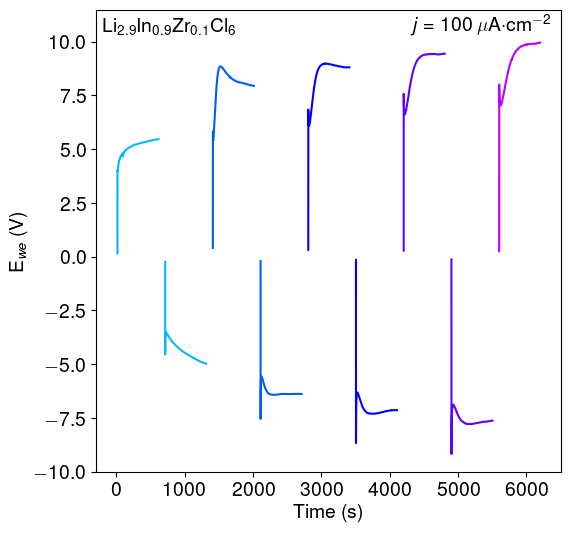

In [111]:
# generates plot
fig, cp_plot = plt.subplots(1, 1, figsize=(6,6))

# plot each positive cycle
for i in CP_cycles_pos:
    cp_plot.plot(CP_cycles_pos[i]["time"], CP_cycles_pos[i]["<Ewe>"], color = colors_cp[i].hex)

# plot each negative cycle
for i in CP_cycles_neg:
    cp_plot.plot(CP_cycles_neg[i]["time"], CP_cycles_neg[i]["<Ewe>"], color = colors_cp[i].hex)

# set axis labels
cp_plot.set_ylabel("E$_{we}$ (V)")
cp_plot.set_xlabel("Time (s)")
cp_plot.set_ylim(-10, 11.5)

# set title
cp_plot.text(-200, 10.5, "Li$_{2.9}$In$_{0.9}$Zr$_{0.1}$Cl$_6$")

# add text for number of cycles
#cp_plot.text(-500, 7.2, "5 Cycles")

# add text for current density
cp_plot.text(4300, 10.5, "$j=100$ $\mu$A$\cdot$cm$^{-2}$")

# saves PNG image of figure
#plt.savefig("C:/Users/sincl/Desktop/cell4_100uA_CP_new.png",bbox_inches='tight',dpi=1000) 